In [1]:
%matplotlib inline 

#Import libraries 
import warnings, pandas as pan, matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

warnings.filterwarnings('ignore')

I always recommend that students and users import all of their libraries at the beginning of the file rather than importing them as they become necessary. Foremost, this is syntatically observed to be the case in most github repositories. Secondarily, this allows the code we write to be more legible

We will begin this lecture by first defining a function that will utilize the KNN algorithm for classification in which the toy example converges on a feasible solution 

The following example will be one in which the algorithm will not converge on a feasible solution and in contrast will be a regression use case.

In [2]:
def model_iris_data(n_neighbors):  
    '''
    This function loads the iris data from the sklearn datasets class, models this data set using KNN, 
    and then displays performance data on the algorithm (Classification)
    
    Arguments:
    
        n_neighbors - int - the number of neighbors to an observation KNN uses to output a discrete or continuous label
        
    '''
    
    raw_iris_data = datasets.load_iris()
    print('Data Set Shape: %s,%s'%(pan.DataFrame(raw_iris_data.data).shape))
    print('\nDescription:\n %s'%pan.DataFrame(raw_iris_data.data).describe())        
    print('\nCorrelation Coefficient Matrix:\n %s'%(pan.DataFrame(raw_iris_data.data).corr()))

    x = pan.DataFrame(raw_iris_data.data[:, :4], columns=raw_iris_data.feature_names)
    y = pan.DataFrame(raw_iris_data.target)

    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    predicted_labels = knn_model.predict(x)
    
    print('\nKNN In Sample Accuracy w/ %s Neighbors: %s'%(n_neighbors, accuracy_score(y, predicted_labels)))
    print('\nKNN In Sample F1 Score w/ %s Neighbors: %s'%(n_neighbors, f1_score(y, predicted_labels, average='macro')))
    print('\nIn Sample Confusion Matrix:\n %s'%(confusion_matrix(y, predicted_labels)))
    
    
model_iris_data(n_neighbors=4)

Data Set Shape: 150,4

Description:
                 0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

Correlation Coefficient Matrix:
           0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000

KNN In Sample Accuracy w/ 4 Neighbors: 0.96

KNN In Sample F1 Score w/ 4 Neighbors: 0.96

In Sample Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Readers will observe that the above sample converged on a solution that yields an excellent accuracy rating with virtually no false predictions. This would be a solution that we should feel comfortable putting to further out of sample testing in the instance that we wanted to deploy this as a solution to this problem. 

With this being said, KNN is a toy dataset whose purpose is more to use as a proxy for understanding machine learning algorithms. The next example **will not** work, however the focus of the discussion will be for us to try and hypothesize why and what model might work better

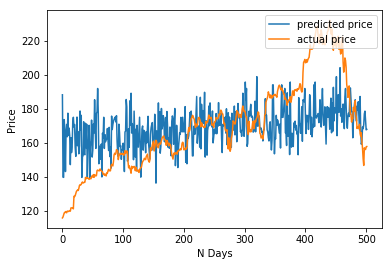

KNN Mean Squared Error: 554.878647078845


In [7]:
def model_stock_data(n_neighbors, ticker_symbol, start_date, end_date, data_source='yahoo'):
    '''
    This function loads the stock data from yahoo finance, models this data set using KNN, 
    and then displays performance data on the algorithm (Regression). Time series is sampled daily

    Arguments:

        n_neighbors - int - the number of neighbors to an observation KNN uses to output a discrete or continuous label
        ticker_symbol - str - the SPY ticker of the stock that is being modeled 
        start_date - str - initial sampling date of the time series (Format - YYYY-MM-DD)
        end_date - str - final sampling date of the time series (Format - YYYY-MM-DD)
        data_source - str - the data source from which the data is pulled (default: 'yahoo')
        
    '''
     
    stock_data = data.DataReader(name=ticker_symbol, 
                                 start=start_date, 
                                 end=end_date,
                                 data_source=data_source)

    x = stock_data.shift(1).dropna().reset_index(drop='index')
    y = stock_data.Close.shift(-1).dropna().reset_index(drop='index')

    knn_model = KNeighborsRegressor(n_neighbors=5).fit(x, y)
    predicted_labels = knn_model.predict(x)

    plt.plot(predicted_labels, label='predicted price')
    plt.plot(y, label='actual price')
    plt.xlabel('N Days')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()
    
    print('KNN Mean Squared Error: %s'%mean_squared_error(y, predicted_labels))

model_stock_data(n_neighbors=4,
                 ticker_symbol='AAPL', 
                 start_date='2017-01-01', 
                 end_date='2019-01-01',
                 data_source='yahoo')

As we can see, the presented solution is exceptionally inaccurate and does not merit further testing if we were to try and deploy this model. Not only is the mean squared error exceptionally high, we can visually see that it is significantly underfitting the data. Why might this be the case?